In [52]:
from google.colab import files
import io

uploaded = files.upload()

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(io.BytesIO(uploaded['titanic.csv'])).set_index('PassengerId')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Saving titanic.csv to titanic (1).csv


KeyError: 'titanic.csv'

#Data Preparation
Prior handling on datasets
- Correlating: How each feature correlate with Survivial
- Completing: Insert or Drop the missing values(Age, Embarked...)
- Correcting: Drop un-nesscessary columns
- Creating: New features
- Assumptions: Assume female is more likely to survive

In [9]:
#Correlating
df_numerical_features = df[['Age','Pclass','SibSp','Parch','Fare']]
df_target = df['Survived']
df_concate = pd.concat([df_numerical_features,df_target],axis=1)
correlation_matrix = df_concate.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
correlation_with_target

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


/tmp/ipython-input-778650155.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = df_concate[['Fare_Group', 'Survived']].groupby(['Fare_Group'], as_index=False).mean().sort_values(by='Survived', ascending=False)


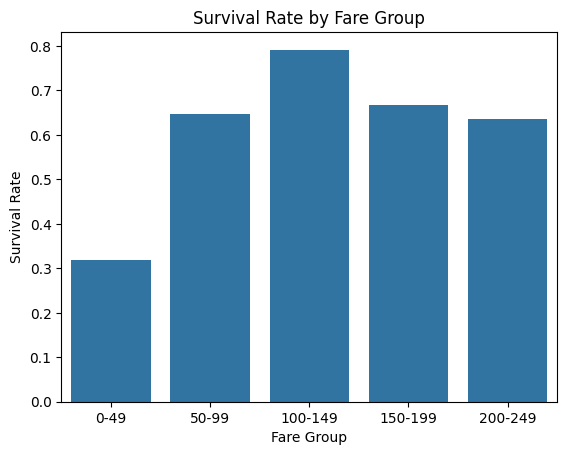

In [10]:
#Fare vs Survival Rate (Visualization)
bins = [0,50,100,150,200,250]
labels = ['0-49','50-99','100-149','150-199','200-249']
fare_group = pd.cut(df['Fare'],bins=bins,labels=labels,right=False)
df_concate['Fare_Group'] = fare_group
fare_survival_rate = df_concate[['Fare_Group', 'Survived']].groupby(['Fare_Group'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x='Fare_Group', y='Survived', data=fare_survival_rate)
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

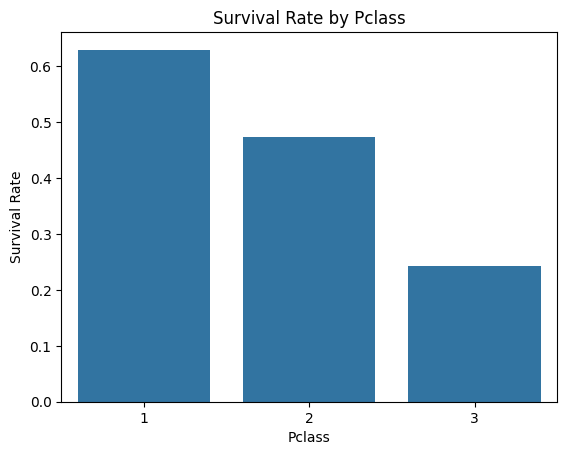

In [17]:
#Pclass vs Survival
df['Pclass'].value_counts()
Pclass_Survival = df_concate[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False)
sns.barplot(x='Pclass',y='Survived',data=Pclass_Survival)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

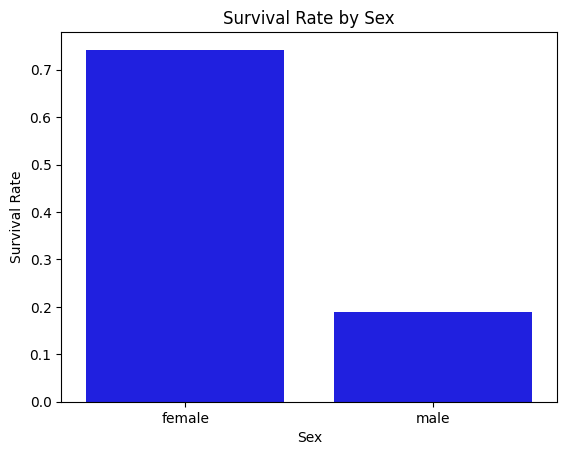

In [12]:
Sex_Survival = df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)
sns.barplot(x='Sex',y='Survived',data=Sex_Survival,color='blue')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

/tmp/ipython-input-1310724251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipython-input-1310724251.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df_concate[['Age_Group','Survived']].groupby(['Age_Group'],as_index=False).mean().sort_values(by='Survived

Text(0, 0.5, 'Survival Rate')

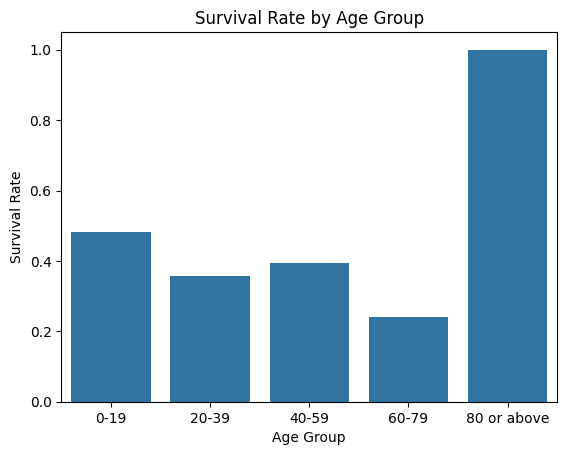

In [13]:
bins = [0,20,40,60,80,100]
labels = ['0-19','20-39','40-59','60-79','80 or above']
df['Age'].fillna(df['Age'].median(),inplace=True)
age_group = pd.cut(df['Age'],bins=bins,labels=labels,right=False)
df_concate['Age_Group'] = age_group
age_survival_rate = df_concate[['Age_Group','Survived']].groupby(['Age_Group'],as_index=False).mean().sort_values(by='Survived',ascending=False)
sns.barplot(x='Age_Group',y='Survived',data=age_survival_rate)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

In [14]:
#drop the un-nessarry columns
df.drop(columns=['Embarked','Cabin'], inplace=True)

In [31]:
#creating new featurues: merge SibSp and Parch to family size
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # Add 1 for the passenger themselves
display(df[['SibSp', 'Parch', 'FamilySize']].head())
df = df.drop(['SibSp','Parch'],axis=1)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


,Survived
Survived,1.000000
FamilySize,0.016639


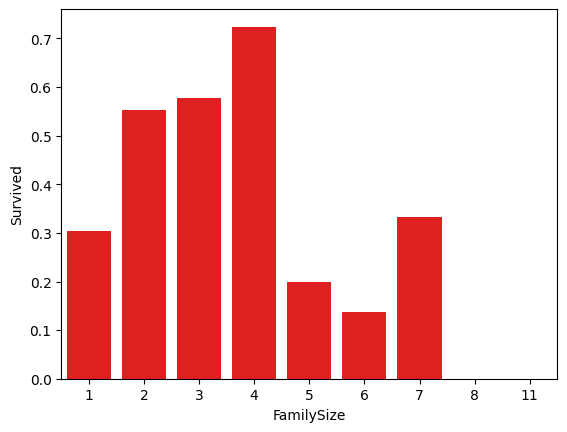

In [59]:
#Correlation between Familysize and Survival Rate
df_family_size_grp = df[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values('Survived',ascending=False)

sns.barplot(x='FamilySize',y='Survived',data=df_family_size_grp,color='red')
correlation_matrix_family = df[['FamilySize','Survived']].corr()
correlation_with_target = correlation_matrix_family['Survived'].sort_values(ascending=False)
correlation_with_target

In [32]:
df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,FamilySize
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,1
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,4


In [33]:
#Describing data
df.info()
df.head(5)
df.describe()
df.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   Ticket      891 non-null    object 
 6   Fare        891 non-null    float64
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


,Name,Sex,Ticket
count,891,891,891
unique,891,2,681
top,"Dooley, Mr. Patrick",male,347082
freq,1,577,7


#Split to training and testing datasets

In [19]:
from sklearn.model_selection import train_test_split
X = df[['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,29.204129,0.553371,0.379213,32.586276
std,0.824584,13.007971,1.176404,0.791669,51.969529
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,30.500000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
# Prepare data
X_train_num = X_train.drop(['Name', 'Ticket'], axis=1)
X_test_num = X_test.drop(['Name', 'Ticket'], axis=1)

# Convert 'Sex' to numerical (0 for male, 1 for female)
X_train_num['Sex'] = X_train_num['Sex'].map({'male': 0, 'female': 1})
X_test_num['Sex'] = X_test_num['Sex'].map({'male': 0, 'female': 1})

X_train_num.fillna(X_train_tree.mean(), inplace=True)
X_test_num.fillna(X_test_tree.mean(), inplace=True)

#Machine Learning
1. Logistic Regression

In [64]:

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_num, y_train)

# Evaluate the model
y_pred_log = logistic_model.predict(X_test_num)
y_pred_score = logistic_model.score(X_test_num, y_test)
print(f"The predicted score using Logistic Regression: {y_pred_score:.2}")

The predicted score using Logistic Regression: 0.81


2. Random Forest

In [65]:
# Logistic Regression
rf_model = RandomForestClassifier(n_estimators=100,random_state=4)
rf_model.fit(X_train_num, y_train)

# Evaluate the model
y_pred_log = rf_model.predict(X_test_num)
y_pred_score = rf_model.score(X_test_num, y_test)
print(f"The predicted score using Random Forest: {y_pred_score:.3}")

The predicted score using Random Forest: 0.799


In [48]:
#Using GridSearchCV to further enhance the accuracy of random forest
from sklearn.model_selection import GridSearchCV
rf_model_grid = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model_grid, param_grid=param_grid, cv=5)
grid_search.fit(X_train_num, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [50]:
grid_search_score_rf = grid_search.score(X_test_num, y_test)
best_params_rf = grid_search.best_params_
print(f"The predicted score using Random Forest with best parameters: {grid_search_score_rf:.2}")
print(f"Best parameters for K Neighbors Classifier: {best_params_rf}")

0.8100558659217877

In [51]:
param_grid_2 = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2,5],
    'bootstrap': [True, False]
}

grid_search_2 = GridSearchCV(estimator=rf_model, param_grid=param_grid_2, cv=5)
grid_search_2.fit(X_train_num, y_train)
grid_search_score_rf2 = grid_search_2.score(X_test_num, y_test)
best_params_rf2 = grid_search_2.best_params_
print(f"The predicted score using Random Forest with best parameters: {grid_search_score_rf2:.3}")
print(f"Best parameters for Random Forest: {best_params_rf2}")

The predicted score using Random Forest with best parameters: 0.82
Best parameters for K Neighbors Classifier: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


3. K Neighbors Classifier

In [46]:
# K Neighbors Classifier with GridSearchCV
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train_num, y_train)

# Evaluate the model
y_pred_knn = grid_search_knn.predict(X_test_num)
y_pred_score_knn = grid_search_knn.score(X_test_num, y_test)
best_params_knn = grid_search_knn.best_params_

print(f"The predicted score using K Neighbors Classifier with best parameters: {y_pred_score_knn:.2}")
print(f"Best parameters for K Neighbors Classifier: {best_params_knn}")

The predicted score using K Neighbors Classifier with best parameters: 0.72
Best parameters for K Neighbors Classifier: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


4. Support Vector Machine

In [47]:
# SVM model
svm_model = SVC()
svm_model.fit(X_train_num, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_num)
y_pred_score_svm = svm_model.score(X_test_num, y_test)

print(f"The predicted score using SVM: {y_pred_score_svm:.2f}")

The predicted score using SVM: 0.65


5. Gaussian Naive Baye

In [66]:
# Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_num, y_train)

# Evaluate the model
y_pred_gnb = gnb_model.predict(X_test_num)
y_pred_score_gnb = gnb_model.score(X_test_num, y_test)

print(f"The predicted score using Gaussian Naive Bayes: {y_pred_score_gnb:.2f}")

The predicted score using Gaussian Naive Bayes: 0.77


The algorithm with highest Accuracy is Random Forest with best parameters: Bootstrap: False, Max_depth: 10, Min_samples_leaf: 2, Min_samples_split: 2, N_estimators: 100


6. Decision Tree

In [67]:
# Decision Tree Classifier with GridSearchCV
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tree_model = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5)
grid_search_tree.fit(X_train_num, y_train)

# Evaluate the model
y_pred_tree = grid_search_tree.predict(X_test_num)
y_pred_score_tree = grid_search_tree.score(X_test_num, y_test)
best_params_tree = grid_search_tree.best_params_

print(f"The predicted score using Decision Tree Classifier with best parameters: {y_pred_score_tree:.2f}")
print(f"Best parameters for Decision Tree Classifier: {best_params_tree}")

The predicted score using Decision Tree Classifier with best parameters: 0.84
Best parameters for Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Prepare data for SGD Classifier (same as for other models)
X_train_sgd = X_train.drop(['Name', 'Ticket'], axis=1)
X_test_sgd = X_test.drop(['Name', 'Ticket'], axis=1)

# Convert 'Sex' to numerical (0 for male, 1 for female)
X_train_sgd['Sex'] = X_train_sgd['Sex'].map({'male': 0, 'female': 1})
X_test_sgd['Sex'] = X_test_sgd['Sex'].map({'male': 0, 'female': 1})

# Handle potential missing values
X_train_sgd.fillna(X_train_sgd.mean(), inplace=True)
X_test_sgd.fillna(X_test_sgd.mean(), inplace=True)

# Scale the data for SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sgd)
X_test_scaled = scaler.transform(X_test_sgd)


# Stochastic Gradient Descent model
sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
sgd.fit(X_train_sgd, y_train)

# Evaluate the model
Y_pred = sgd.predict(X_test_sgd)
sgd_score = round(sgd.score(X_test_sgd, y_test), 2)

print(f"The predicted score using Stochastic Gradient Descent: {sgd_score:.5f}")

The predicted score using Stochastic Gradient Descent: 0.70000


In [86]:
# Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train_num, y_train)

# Evaluate the model
Y_pred_perceptron = perceptron.predict(X_test_num)
perceptron_score = round(perceptron.score(X_test_num, y_test), 2)

print(f"The predicted score using Perceptron: {perceptron_score:.5f}")

The predicted score using Perceptron: 0.75000


Model evaluation

In [93]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVC',
              'Naive Bayes', 'Decision Tree',
              'Stochastic Gradient Decent','Perceptron' ],
    'Score': [y_pred_score, grid_search_score_rf2, y_pred_score_knn,
              y_pred_score_svm, y_pred_score_gnb, y_pred_score_tree,
              sgd_score, perceptron_score]})
model_sorted = models.sort_values(by='Score', ascending=False).reset_index(drop=True)

print(f'The best estimator for Titanic Survival Prediction is {model_sorted.loc[0, 'Model']}.\nThe score of the model is: {model_sorted.loc[0, 'Score']:.3}.')

The best estimator for Titanic Survival Prediction is Decision Tree.
The score of the model is: 0.844.
